# Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Importing Headcount Final

In [4]:
data = pd.read_csv('Headcount Train Aug Ver2.csv',encoding = 'latin')

In [5]:
data

,Effective_Date,Termination_Status,employee_id,termination_date,region,region_reporting,location,location_country,location_tier,location_cost,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,8/31/2020,No,31311,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,14.17,57.13,81.0,positive,34.0,No,No,1.67,No,0.34
1,8/31/2020,No,36704,NaN,Americas,Americas,Santa Clara,United States of America,Tier 1,High-Cost,...,-44.92,41.38,83.0,positive,23.0,No,No,1.67,No,0.34
2,8/31/2020,No,1502,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,374.66,42.86,80.0,positive,16.0,No,No,1.67,No,0.34
3,8/31/2020,No,39494,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,-74.47,48.00,NaN,positive,35.0,Yes,Yes,0.75,No,0.34
4,8/31/2020,Yes,38122,1/3/2020,Americas,Americas,Remote-FL,United States of America,All Others,High-Cost,...,-74.47,7.69,78.0,NaN,39.0,Yes,Yes,1.00,No,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,8/31/2020,No,35043,NaN,Americas,Americas,Bethesda,United States of America,All Others,High-Cost,...,-21.28,41.94,68.0,positive,16.0,No,No,1.25,No,0.34
12208,8/31/2020,No,35997,NaN,EMEA,EMEA,Remote-Chalfont,United Kingdom,All Others,High-Cost,...,-39.01,52.17,84.0,positive,20.5,Yes,Yes,1.09,No,0.34
12209,8/31/2020,No,36079,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-50.83,18.00,78.0,positive,40.0,Yes,Yes,1.00,No,0.34
12210,8/31/2020,No,20204,NaN,Americas,Americas,Alpharetta,United States of America,Tier 2,High-Cost,...,47.74,57.13,81.0,positive,27.0,No,No,1.67,No,0.34


In [6]:
data.head()

,Effective_Date,Termination_Status,employee_id,termination_date,region,region_reporting,location,location_country,location_tier,location_cost,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,8/31/2020,No,31311,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,14.17,57.13,81.0,positive,34.0,No,No,1.67,No,0.34
1,8/31/2020,No,36704,NaN,Americas,Americas,Santa Clara,United States of America,Tier 1,High-Cost,...,-44.92,41.38,83.0,positive,23.0,No,No,1.67,No,0.34
2,8/31/2020,No,1502,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,374.66,42.86,80.0,positive,16.0,No,No,1.67,No,0.34
3,8/31/2020,No,39494,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,-74.47,48.00,NaN,positive,35.0,Yes,Yes,0.75,No,0.34
4,8/31/2020,Yes,38122,1/3/2020,Americas,Americas,Remote-FL,United States of America,All Others,High-Cost,...,-74.47,7.69,78.0,NaN,39.0,Yes,Yes,1.00,No,1.67


In [7]:
data.tail()

,Effective_Date,Termination_Status,employee_id,termination_date,region,region_reporting,location,location_country,location_tier,location_cost,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
12207,8/31/2020,No,35043,NaN,Americas,Americas,Bethesda,United States of America,All Others,High-Cost,...,-21.28,41.94,68.0,positive,16.0,No,No,1.25,No,0.34
12208,8/31/2020,No,35997,NaN,EMEA,EMEA,Remote-Chalfont,United Kingdom,All Others,High-Cost,...,-39.01,52.17,84.0,positive,20.5,Yes,Yes,1.09,No,0.34
12209,8/31/2020,No,36079,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-50.83,18.00,78.0,positive,40.0,Yes,Yes,1.00,No,0.34
12210,8/31/2020,No,20204,NaN,Americas,Americas,Alpharetta,United States of America,Tier 2,High-Cost,...,47.74,57.13,81.0,positive,27.0,No,No,1.67,No,0.34
12211,8/31/2020,Yes,36816,7/5/2019,Americas,Americas,Raleigh,United States of America,Tier 1,High-Cost,...,-74.47,37.93,72.0,NaN,41.0,No,No,1.67,No,1.67


In [8]:
data.columns

Index(['Effective_Date', 'Termination_Status', 'employee_id',
       'termination_date', 'region', 'region_reporting', 'location',
       'location_country', 'location_tier', 'location_cost',
       'location_reporting', 'locations_wf', 'restated_LOB', 'tenure', 'age',
       'generation', 'qc_non_qc', 'is_people_manager', 'sales_role',
       'job_family', 'job_family_group', 'white_nonwhite',
       'adjusted_ethnicity', 'gender', 'management_level',
       'management_level_category', 'employee_level2', 'employee_level3',
       'management_chain_level_employee', 'add_reason', 'Job_level',
       'pay_rate_type', 'Full_Time_vs_Part_Time', 'sales_sub_role',
       'fte_percentage', 'scheduled_weekly_hours', 'ccq', 'is_DQC',
       'Stock_Eligible', 'remote_location', 'Customer_Facing', 'Plan_Category',
       'total_bonus_amount_USD', 'total_allowance_amount_USD',
       'total_base_pay_amount_usd', 'compensation_usd',
       'competitive_range_low_base_salary',
       'market_refere

In [9]:
print('lenght of data is', len(data))

lenght of data is 12212


In [10]:
data.shape

(12212, 83)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12212 entries, 0 to 12211
Data columns (total 83 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Effective_Date                                              12212 non-null  object 
 1   Termination_Status                                          12212 non-null  object 
 2   employee_id                                                 12212 non-null  int64  
 3   termination_date                                            3261 non-null   object 
 4   region                                                      12212 non-null  object 
 5   region_reporting                                            12212 non-null  object 
 6   location                                                    12212 non-null  object 
 7   location_country                                            12212 non-null  object 
 

In [12]:
data.dtypes

Effective_Date                                      object
Termination_Status                                  object
employee_id                                          int64
termination_date                                    object
region                                              object
                                                    ...   
Mgt_Level_one_level_up_change_rolling_12_months     object
Mgt_Level_two_level_up_change_rolling_12_months     object
time_with_current_manager_in_years                 float64
ER_PIP_Case                                         object
time_since_compensation_change_in_years            float64
Length: 83, dtype: object

In [15]:
Test_data = pd.read_csv('Headcount Trest Sep Ver2.csv',encoding = 'latin')

In [16]:
Test_data

,Effective_Date,Termination_Status,employee_id,termination_date,region,region_reporting,location,location_country,location_tier,location_cost,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,9/30/2020,No,15,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,21.74,-6.67,66.0,NaN,13.0,No,No,1.75,No,0.42
1,9/30/2020,No,16,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,563.34,46.15,71.0,NaN,14.0,Yes,Yes,0.33,No,0.00
2,9/30/2020,No,21,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,280.76,41.80,79.0,positive,10.0,Yes,Yes,0.08,No,0.42
3,9/30/2020,No,55,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,490.57,-6.67,66.0,NaN,16.0,No,No,1.75,No,0.42
4,9/30/2020,No,57,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,488.69,57.13,81.0,positive,14.0,No,No,1.75,No,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8992,9/30/2020,No,41626,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-99.76,25.00,79.0,NaN,28.0,No,No,0.00,No,0.00
8993,9/30/2020,No,41627,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-99.53,34.78,81.0,NaN,20.0,No,No,0.00,No,0.00
8994,9/30/2020,No,41628,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-100.00,25.00,79.0,NaN,37.0,No,No,0.00,No,0.00
8995,9/30/2020,No,41634,NaN,APAC,APJ Excl. India,Nanjing,China,Tier 2,Low-Cost,...,-99.76,25.00,76.0,NaN,25.0,No,No,0.00,No,0.00


In [17]:
print('Length of the Test Data',len(Test_data))

Length of the Test Data 8997


# Adding the Test data in the of training data for the preparation

In [18]:
data=pd.concat([data,Test_data])
data=data.reset_index()
data=data.drop(columns=['index'])
data

,Effective_Date,Termination_Status,employee_id,termination_date,region,region_reporting,location,location_country,location_tier,location_cost,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,8/31/2020,No,31311,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,14.17,57.13,81.0,positive,34.0,No,No,1.67,No,0.34
1,8/31/2020,No,36704,NaN,Americas,Americas,Santa Clara,United States of America,Tier 1,High-Cost,...,-44.92,41.38,83.0,positive,23.0,No,No,1.67,No,0.34
2,8/31/2020,No,1502,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,374.66,42.86,80.0,positive,16.0,No,No,1.67,No,0.34
3,8/31/2020,No,39494,NaN,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,...,-74.47,48.00,NaN,positive,35.0,Yes,Yes,0.75,No,0.34
4,8/31/2020,Yes,38122,1/3/2020,Americas,Americas,Remote-FL,United States of America,All Others,High-Cost,...,-74.47,7.69,78.0,NaN,39.0,Yes,Yes,1.00,No,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,9/30/2020,No,41626,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-99.76,25.00,79.0,NaN,28.0,No,No,0.00,No,0.00
21205,9/30/2020,No,41627,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-99.53,34.78,81.0,NaN,20.0,No,No,0.00,No,0.00
21206,9/30/2020,No,41628,NaN,APAC,India,Bangalore,India,Tier 1,Low-Cost,...,-100.00,25.00,79.0,NaN,37.0,No,No,0.00,No,0.00
21207,9/30/2020,No,41634,NaN,APAC,APJ Excl. India,Nanjing,China,Tier 2,Low-Cost,...,-99.76,25.00,76.0,NaN,25.0,No,No,0.00,No,0.00


In [19]:
data=data.drop(columns=['termination_date'])

# Checking Null Values

In [20]:
data[data.isnull().any(axis=1)].head()

,Effective_Date,Termination_Status,employee_id,region,region_reporting,location,location_country,location_tier,location_cost,location_reporting,...,%_Abover_or_Below_Average_Tenure_Company,eNPS,Avg_GPTW,touchpoint_sentiment,Time_to_retirement_in_years,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,time_with_current_manager_in_years,ER_PIP_Case,time_since_compensation_change_in_years
0,8/31/2020,No,31311,APAC,India,Bangalore,India,Tier 1,Low-Cost,Bangalore,...,14.17,57.13,81.0,positive,34.0,No,No,1.67,No,0.34
1,8/31/2020,No,36704,Americas,Americas,Santa Clara,United States of America,Tier 1,High-Cost,Santa Clara,...,-44.92,41.38,83.0,positive,23.0,No,No,1.67,No,0.34
2,8/31/2020,No,1502,APAC,India,Bangalore,India,Tier 1,Low-Cost,Bangalore,...,374.66,42.86,80.0,positive,16.0,No,No,1.67,No,0.34
3,8/31/2020,No,39494,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,High-Cost,Fort Lauderdale,...,-74.47,48.00,NaN,positive,35.0,Yes,Yes,0.75,No,0.34
4,8/31/2020,Yes,38122,Americas,Americas,Remote-FL,United States of America,All Others,High-Cost,Remote AMS,...,-74.47,7.69,78.0,NaN,39.0,Yes,Yes,1.00,No,1.67


In [21]:
np.sum(data.isnull().any(axis=1))

21208

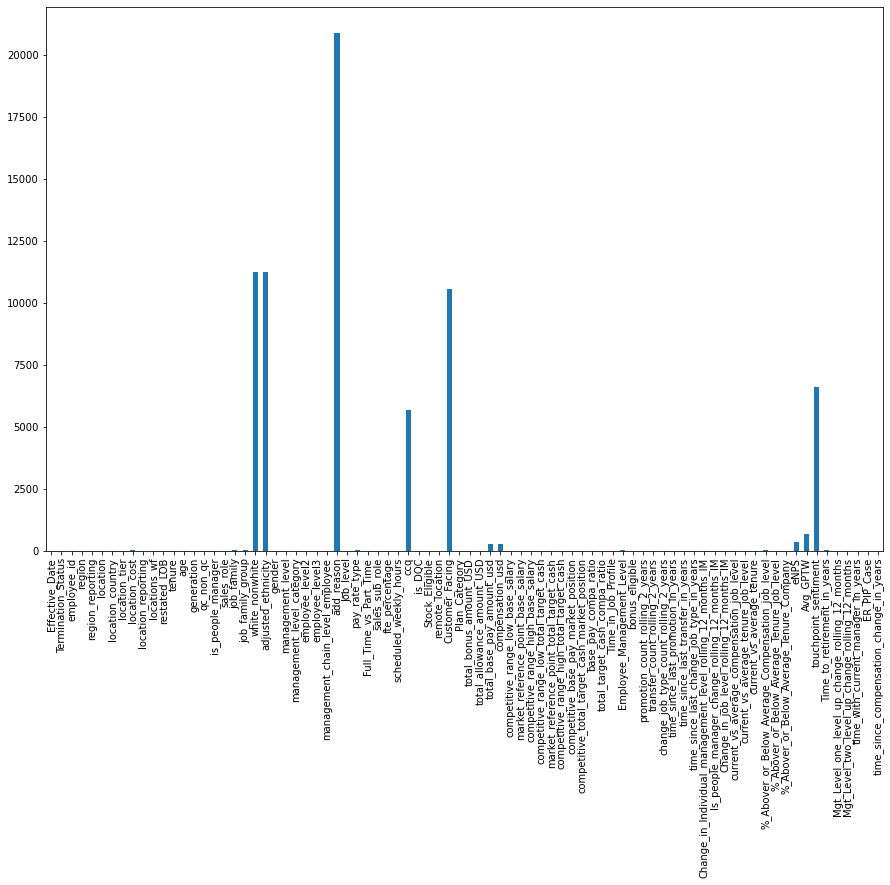

In [22]:
missing_cols = data.isnull().sum()
missing_cols.plot.bar(figsize=(15,10))
plt.show()

# Dropping the features which have more than 0.001 % of missing values

In [23]:
missing_v = [col for col in data.columns if (data[col].isnull().sum()/data.shape[0]) * 100 > 0.001]
print(len(missing_v))
for cols in missing_v:
    del data[cols]

20


# Again Graph that showing the missing values features

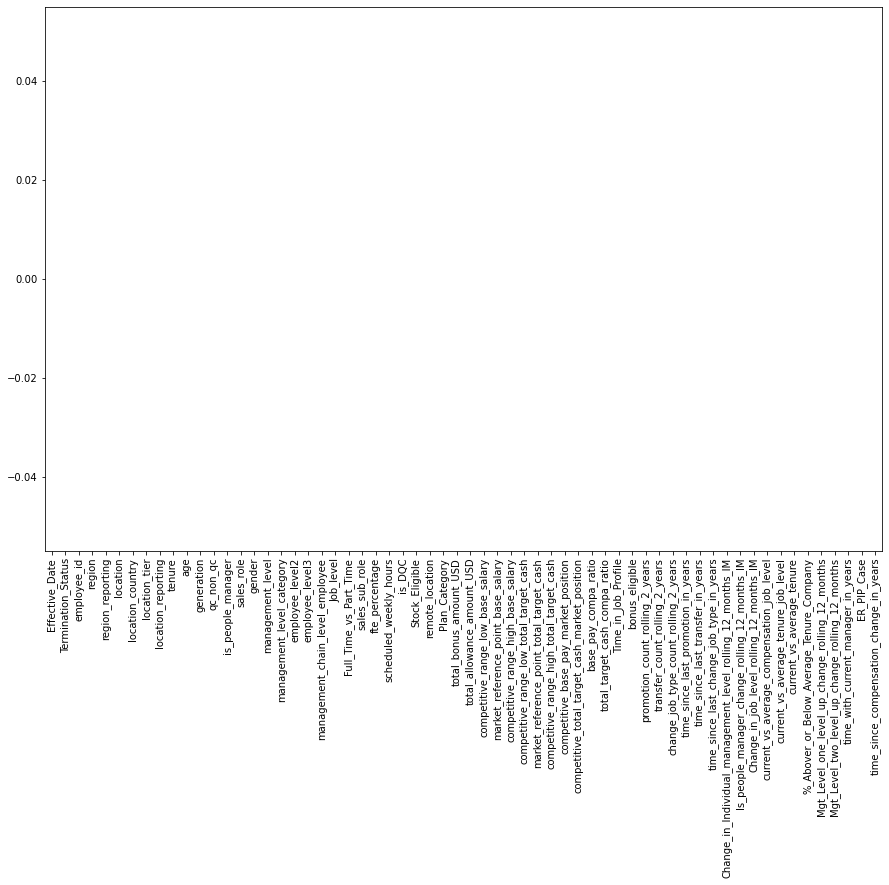

In [24]:
missing_v = data.isnull().sum()
missing_v.plot.bar(figsize=(15,10))
plt.show()

# Checking again Count of Null values

In [25]:
np.sum(data.isnull().any(axis=1))

0

In [26]:
data.describe()

,employee_id,tenure,age,management_chain_level_employee,fte_percentage,scheduled_weekly_hours,total_bonus_amount_USD,total_allowance_amount_USD,competitive_range_low_base_salary,market_reference_point_base_salary,...,Time_in_Job_Profile,promotion_count_rolling_2_years,transfer_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_promotion_in_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,%_Abover_or_Below_Average_Tenure_Company,time_with_current_manager_in_years,time_since_compensation_change_in_years
count,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,2.120900e+04,21209.000000,21209.000000,21209.000000,...,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000,21209.000000
mean,28072.056014,4.612270,38.489934,7.545947,99.895414,39.628554,2.561825e+04,1118.500489,72903.711426,91129.648515,...,1.620914,0.291999,0.074119,0.856523,2.413149,4.107432,1.871646,8.842324,1.079552,0.517428
std,12128.516305,4.453279,9.863105,1.207559,1.992849,1.304349,4.347601e+04,3510.482990,50980.449816,63725.563350,...,1.066213,0.518729,0.277189,1.077583,2.733791,4.278920,2.407441,105.080716,0.623963,0.375083
min,15.000000,-0.080000,0.000000,2.000000,25.000000,10.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.080000,-0.080000,0.000000,-101.880000,0.000000,0.000000
25%,18115.000000,1.420000,31.000000,7.000000,100.000000,40.000000,0.000000e+00,0.000000,31203.200000,39004.000000,...,0.832306,0.000000,0.000000,0.000000,0.830000,1.180000,0.500000,-66.560000,0.420000,0.340000
50%,33957.000000,3.250000,37.000000,8.000000,100.000000,40.000000,9.411290e+03,0.000000,65356.000000,81695.000000,...,1.746748,0.000000,0.000000,1.000000,1.670000,2.500000,1.170000,-23.470000,1.250000,0.420000
75%,38163.000000,6.580000,45.000000,8.000000,100.000000,40.000000,3.343423e+04,0.000000,105343.000000,131679.000000,...,1.998631,1.000000,0.000000,1.000000,3.000000,5.670000,2.260000,54.940000,1.670000,0.420000
max,41646.000000,28.170000,75.000000,11.000000,107.140000,45.000000,1.500000e+06,35437.440000,437600.000000,547000.000000,...,11.548254,4.000000,3.000000,13.000000,25.000000,28.170000,25.000000,563.770000,1.750000,1.750000


In [27]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   62


In [28]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   21209


# Data information with memory usage

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21209 entries, 0 to 21208
Data columns (total 62 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Effective_Date                                              21209 non-null  object 
 1   Termination_Status                                          21209 non-null  object 
 2   employee_id                                                 21209 non-null  int64  
 3   region                                                      21209 non-null  object 
 4   region_reporting                                            21209 non-null  object 
 5   location                                                    21209 non-null  object 
 6   location_country                                            21209 non-null  object 
 7   location_tier                                               21209 non-null  object 
 

# Checking duplicate data

In [30]:
current=len(data)
print('Rows of data before Delecting ', current)

Rows of data before Delecting  21209


In [31]:
data=data.drop_duplicates()

In [32]:
now=len(data)
print('Rows of data before Delecting ', now)

Rows of data before Delecting  21209


In [33]:
diff=current-now
print('Duplicated rows are ', diff)

Duplicated rows are  0


# Data Visualization

# Labels Distribution of  data

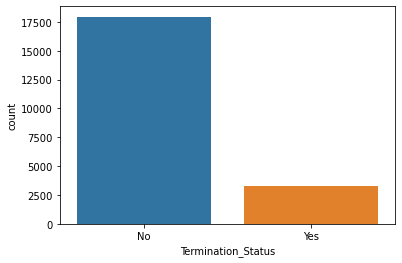

In [34]:
sns.countplot(data= data, x = "Termination_Status")
plt.show()

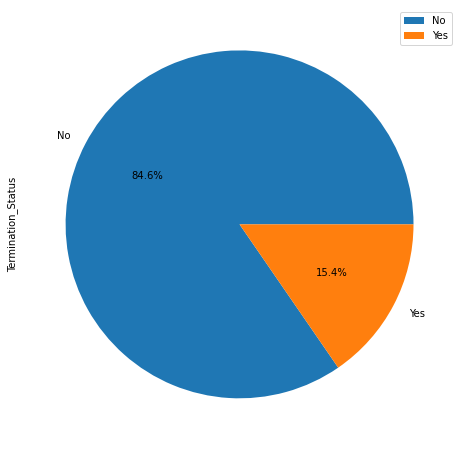

In [35]:
data["Termination_Status"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [36]:
data["Termination_Status"].value_counts()

No     17942
Yes     3267
Name: Termination_Status, dtype: int64

# Correlation: A heat map for graphical representation of data where the individual values contained in a matrix are represented as colors

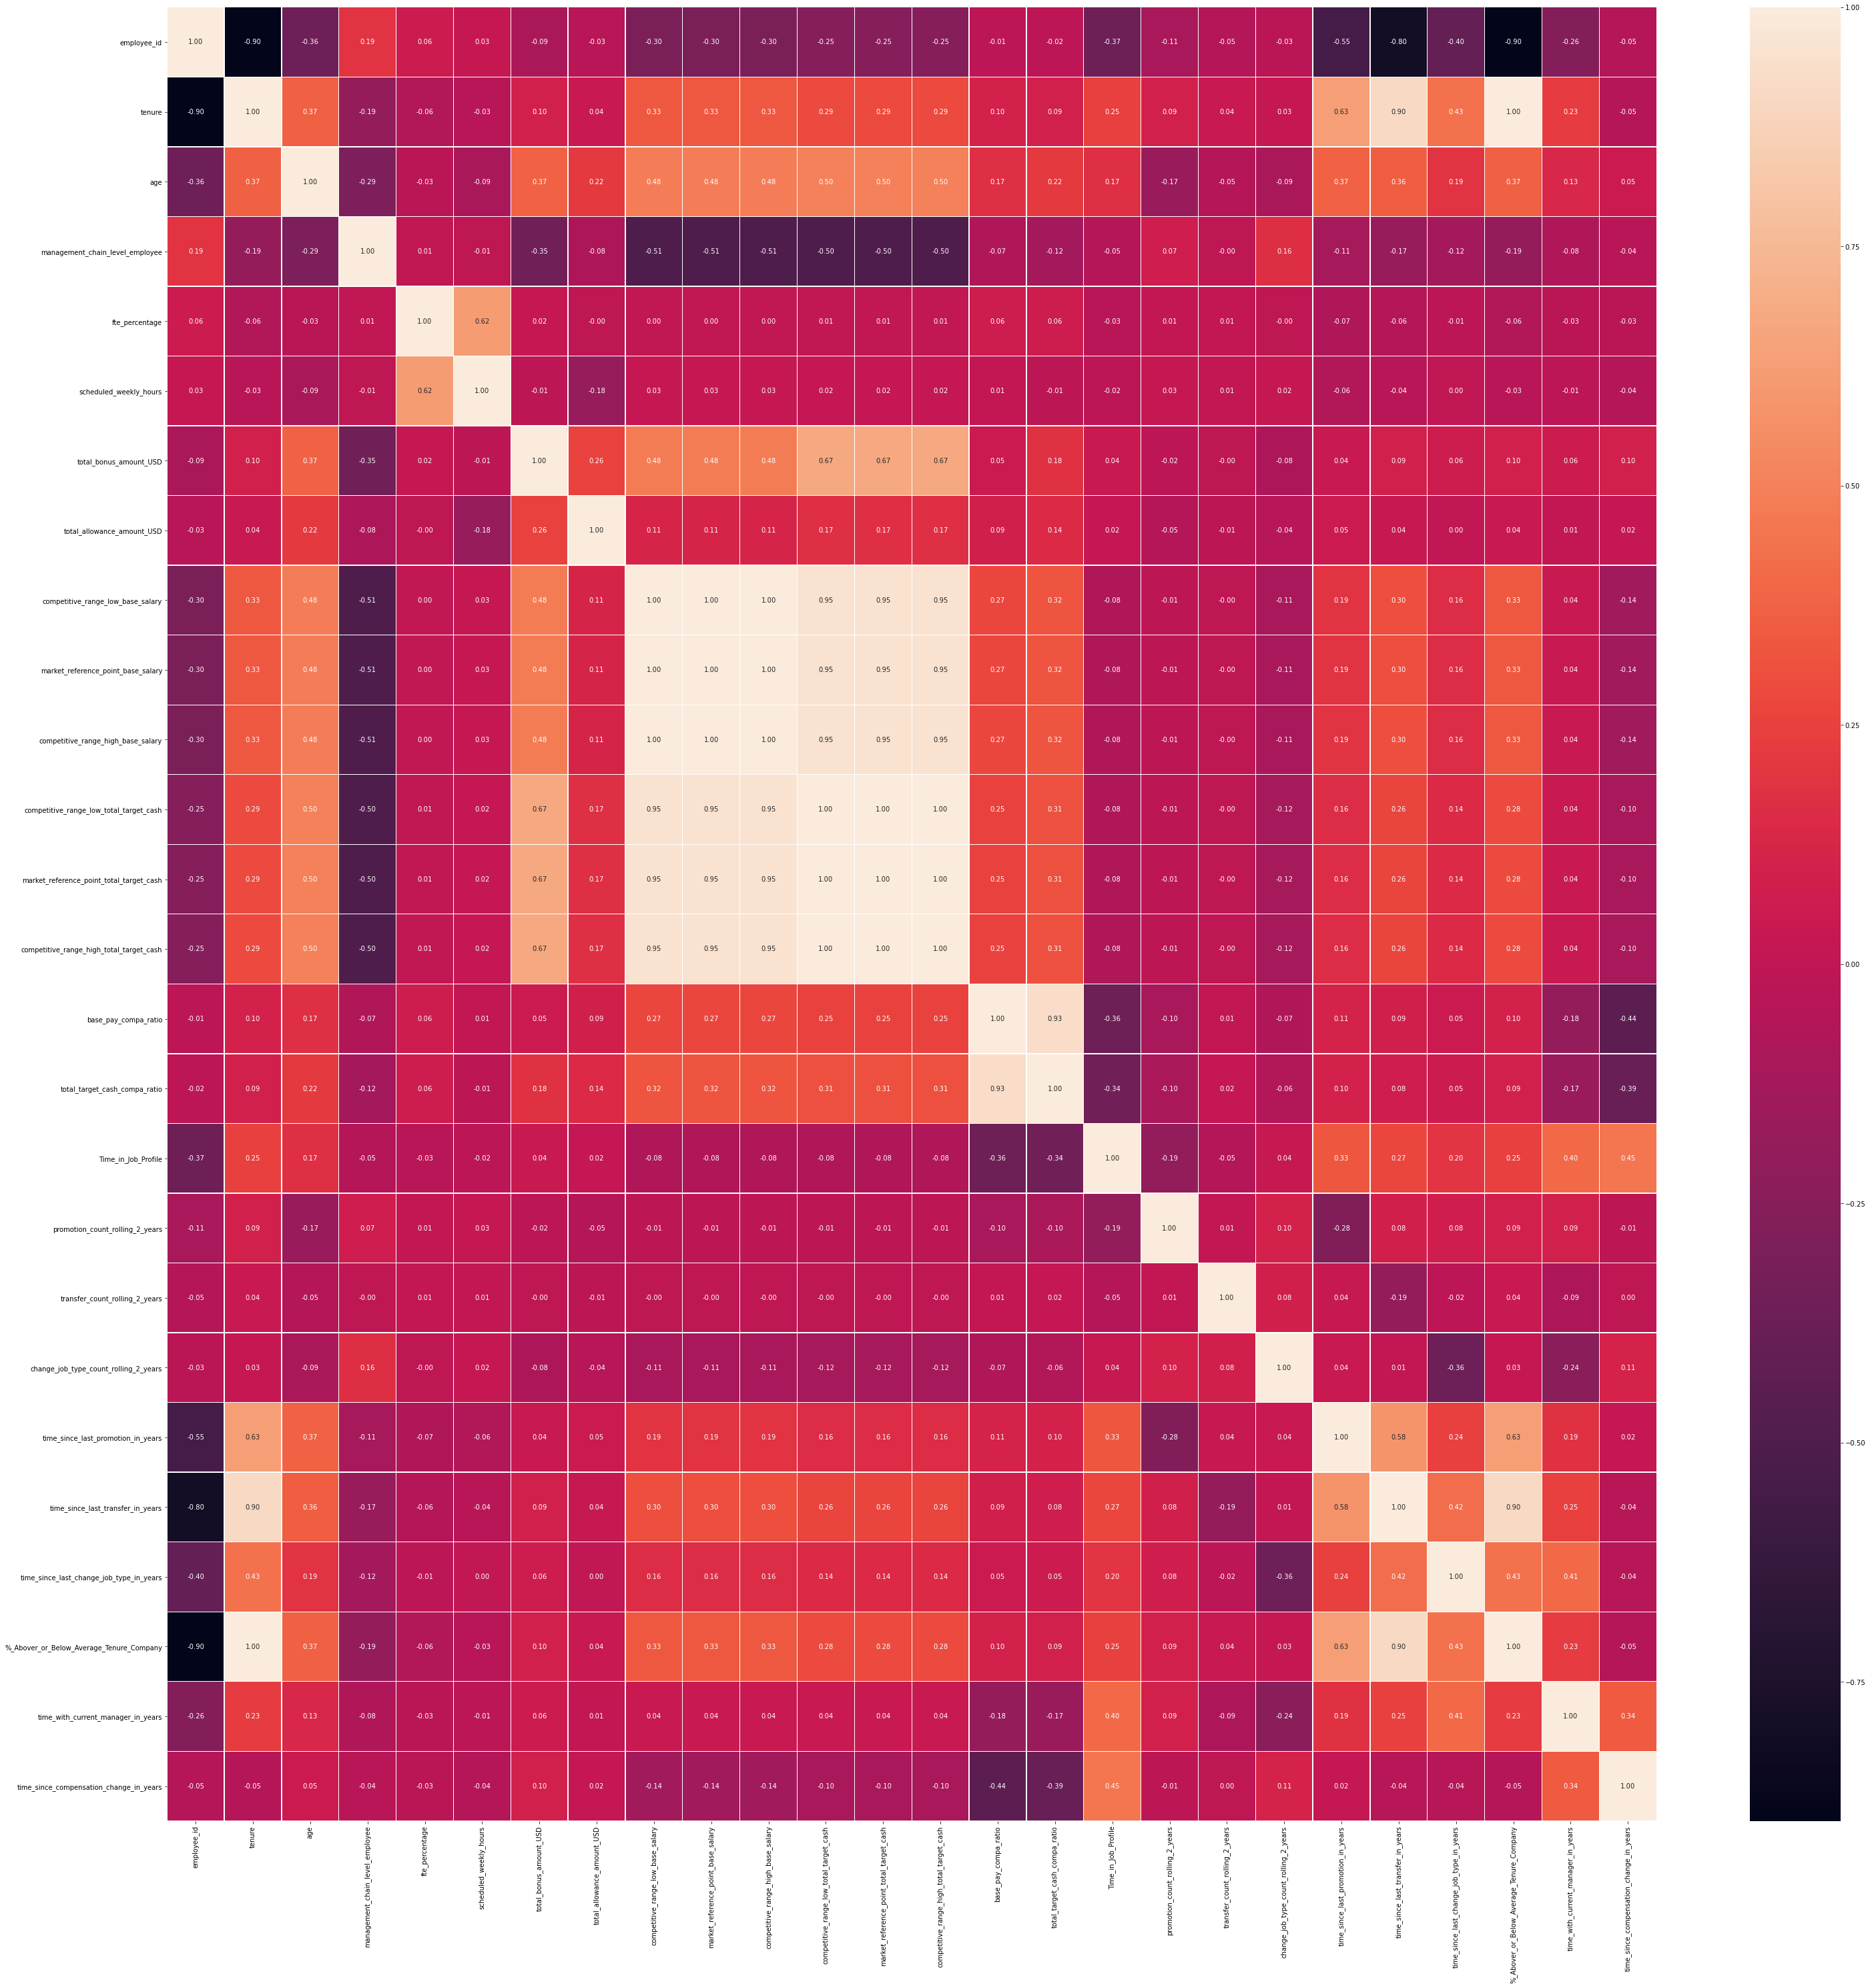

In [37]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

# Features Distribution Graphs

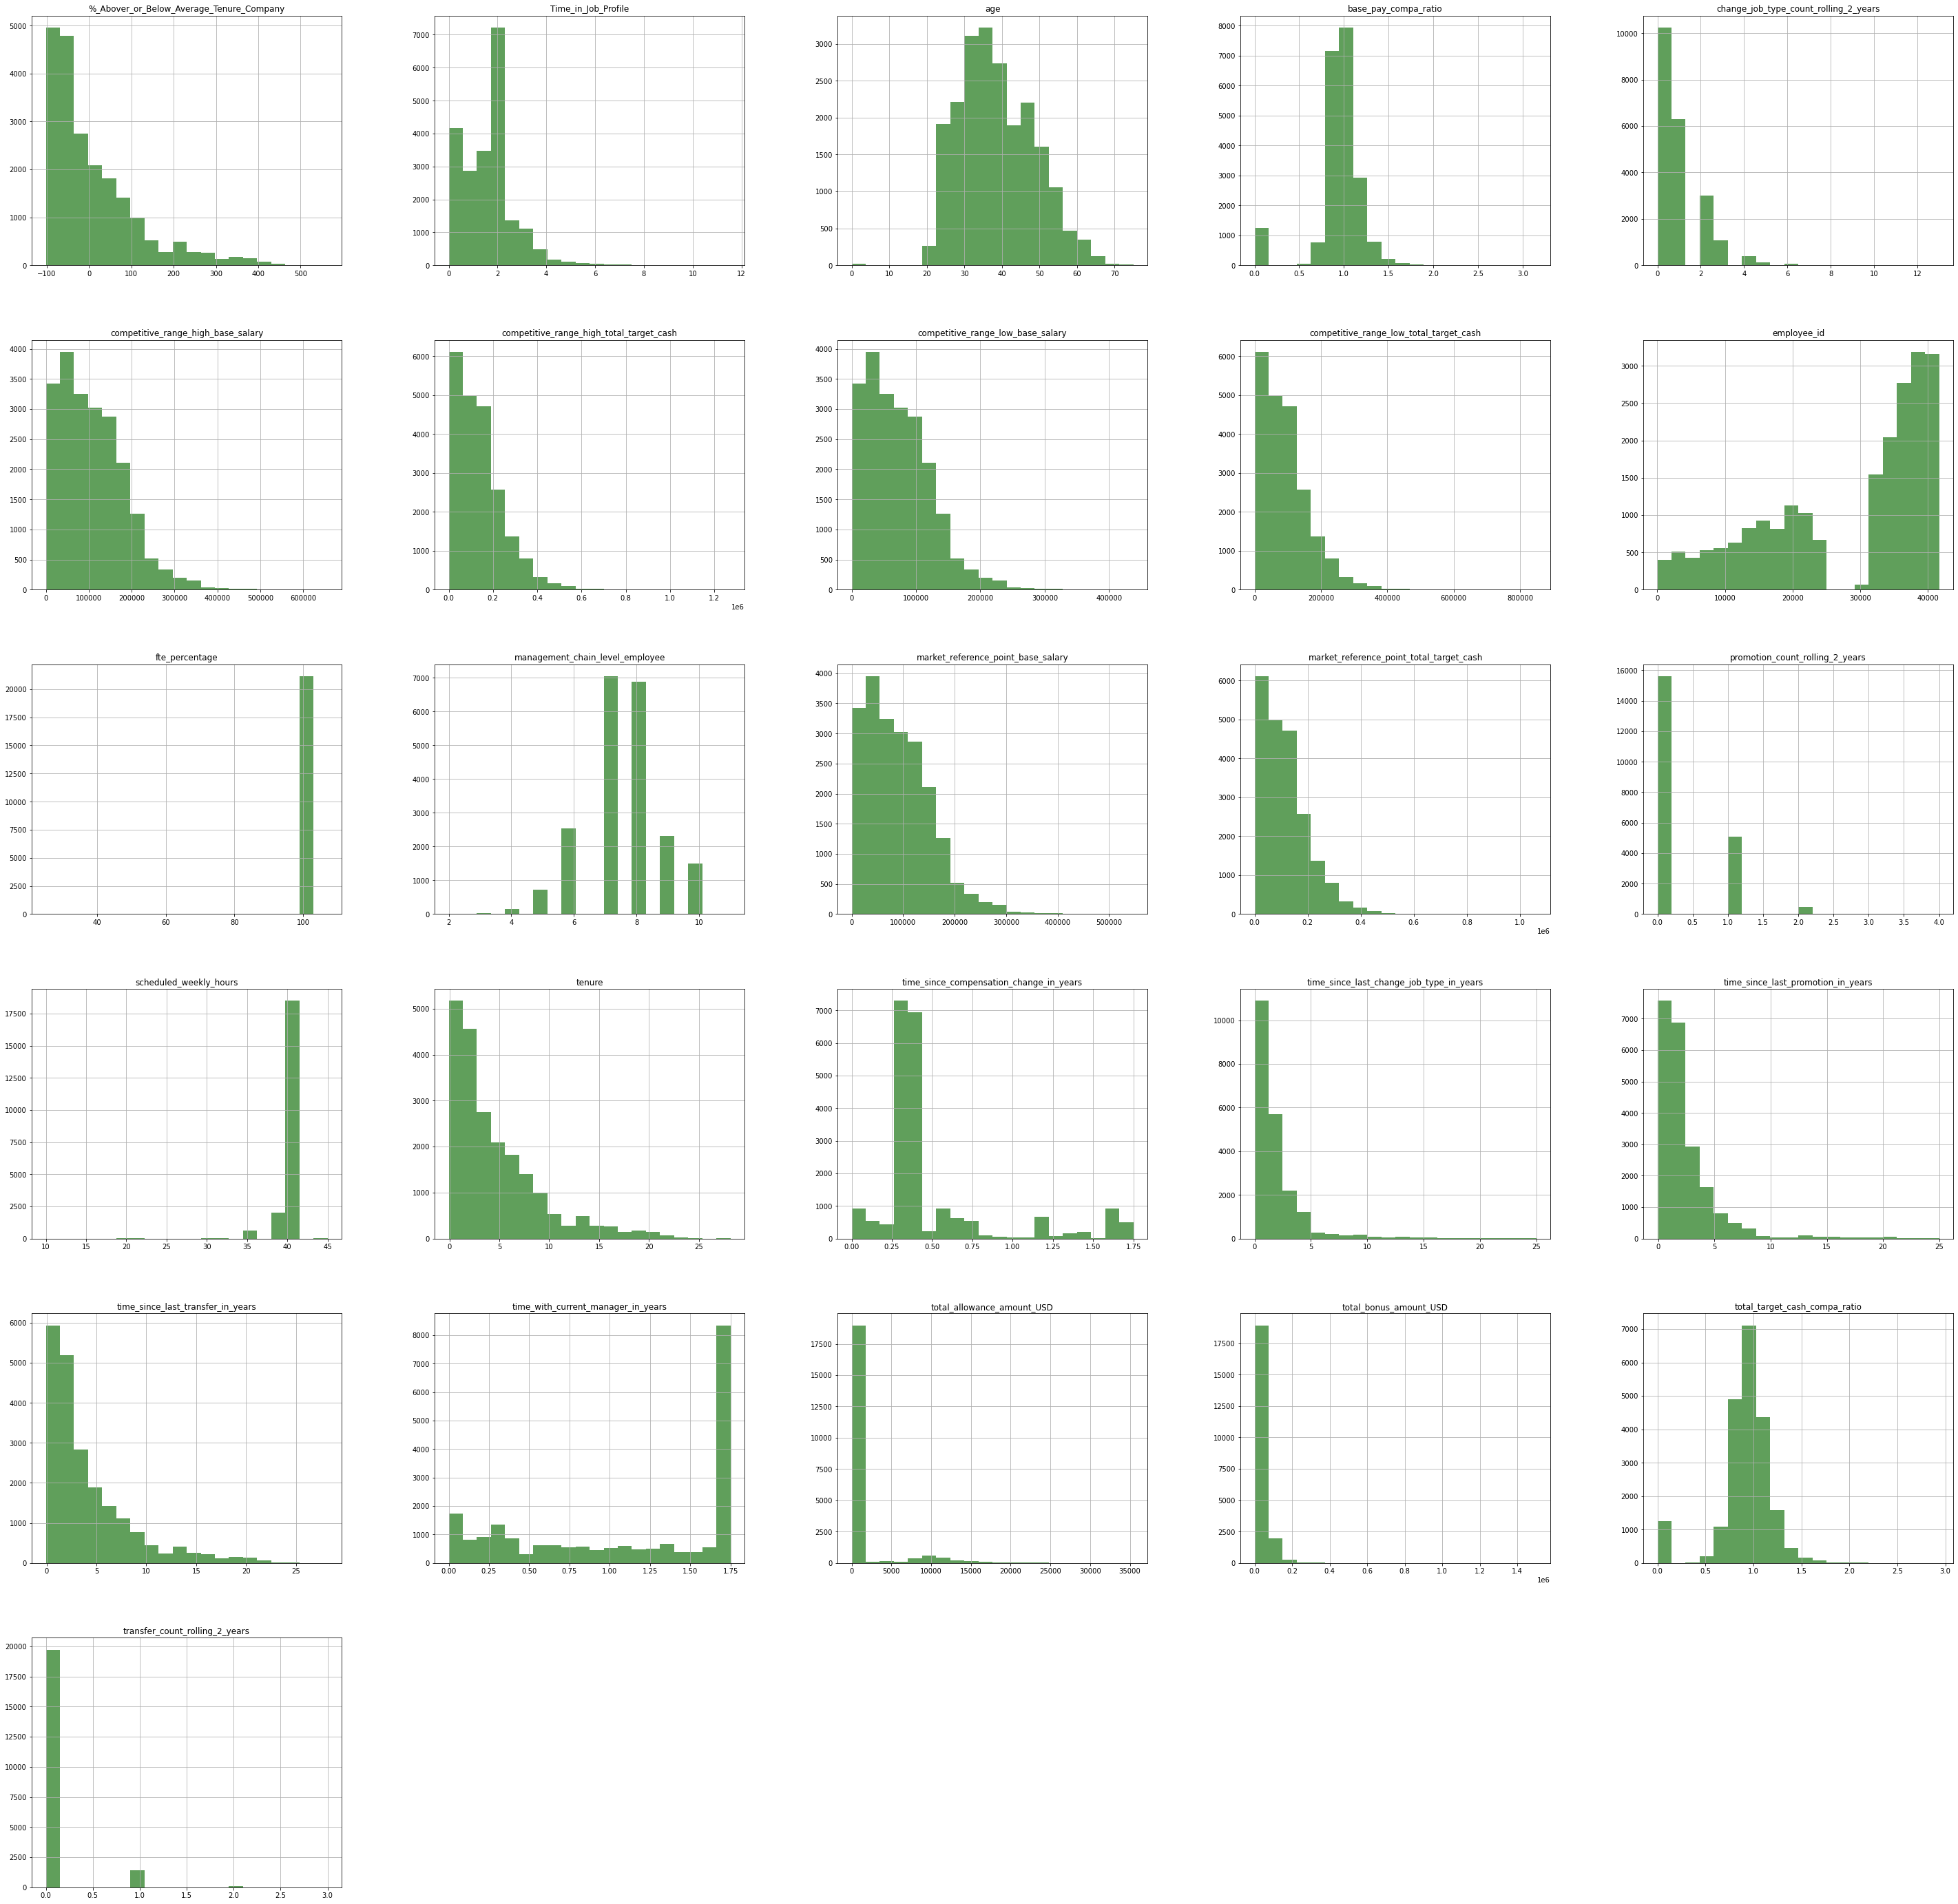

In [38]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

In [39]:
data=data.drop(columns=['Effective_Date'])

In [40]:
data_columns=data.columns

# Converting Termination_Status in 1 as No and 0 as Yes

In [41]:
data['Termination_Status']=data['Termination_Status'].replace('No',1)
data['Termination_Status']=data['Termination_Status'].replace('Yes',0)

# Selecting the Categorical/object data types to convert in numeric form 

In [42]:
obj_data = data.select_dtypes(include=['object']).copy()
obj_data.head()

,region,region_reporting,location,location_country,location_tier,location_reporting,generation,qc_non_qc,is_people_manager,sales_role,...,bonus_eligible,Change_in_Individual_management_level_rolling_12_months_IM,Is_people_manager_change_rolling_12_months_IM,Change_in_job_level_rolling_12_months_IM,current_vs_average_compensation_job_level,current_vs_average_tenure_job_level,current_vs_average_tenure,Mgt_Level_one_level_up_change_rolling_12_months,Mgt_Level_two_level_up_change_rolling_12_months,ER_PIP_Case
0,APAC,India,Bangalore,India,Tier 1,Bangalore,Millennial,NON QC,No,Customer Tech Support,...,No,No,No,Yes,Higher than average,Higher than average,Higher than average,No,No,No
1,Americas,Americas,Santa Clara,United States of America,Tier 1,Santa Clara,Millennial,NON QC,No,No Sales Role,...,No,No,No,No,Higher than average,Higher than average,Lower than average,No,No,No
2,APAC,India,Bangalore,India,Tier 1,Bangalore,GenX,NON QC,No,No Sales Role,...,No,Yes,No,Yes,Higher than average,Higher than average,Higher than average,No,No,No
3,Americas,Americas,Fort Lauderdale,United States of America,Tier 1,Fort Lauderdale,Millennial,NON QC,No,No Sales Role,...,No,No,No,No,Lower than average,Lower than average,Lower than average,Yes,Yes,No
4,Americas,Americas,Remote-FL,United States of America,All Others,Remote AMS,Millennial,NON QC,No,No Sales Role,...,No,No,No,No,Lower than average,Lower than average,Lower than average,Yes,Yes,No


# Now Dropping the Categorical/object data types from data because we will merge these after converting into numeric form

In [43]:
data=data.drop(obj_data,1)
data.head()

,Termination_Status,employee_id,tenure,age,management_chain_level_employee,fte_percentage,scheduled_weekly_hours,total_bonus_amount_USD,total_allowance_amount_USD,competitive_range_low_base_salary,...,Time_in_Job_Profile,promotion_count_rolling_2_years,transfer_count_rolling_2_years,change_job_type_count_rolling_2_years,time_since_last_promotion_in_years,time_since_last_transfer_in_years,time_since_last_change_job_type_in_years,%_Abover_or_Below_Average_Tenure_Company,time_with_current_manager_in_years,time_since_compensation_change_in_years
0,1,31311,4.83,29,10,100.0,40,0.0,0.0,18022.40000,...,0.416153,1,1,0,0.416438,1.67,4.17,14.17,1.67,0.34
1,1,36704,2.33,42,8,100.0,40,0.0,0.0,98210.00000,...,1.916495,0,0,0,2.330000,2.33,2.33,-44.92,1.67,0.34
2,1,1502,20.08,47,8,100.0,40,0.0,0.0,8721.06752,...,1.916495,0,0,0,4.419178,20.08,4.32,374.66,1.67,0.34
3,1,39494,1.08,30,6,100.0,40,0.0,0.0,80742.00000,...,1.169062,0,0,2,1.080000,1.08,0.82,-74.47,0.75,0.34
4,0,38122,1.08,26,6,100.0,40,0.0,0.0,74335.00000,...,1.084188,0,0,2,1.080000,1.08,0.38,-74.47,1.00,1.67


# One Hot Encoding from catergorical/object data types to numeric

In [44]:
obj_data=pd.get_dummies(obj_data)
obj_data.head()

,region_APAC,region_Americas,region_EMEA,region_reporting_APJ Excl. India,region_reporting_Americas,region_reporting_EMEA,region_reporting_India,location_Alpharetta,location_Amsterdam,location_Athens,...,current_vs_average_tenure_job_level_Higher than average,current_vs_average_tenure_job_level_Lower than average,current_vs_average_tenure_Higher than average,current_vs_average_tenure_Lower than average,Mgt_Level_one_level_up_change_rolling_12_months_No,Mgt_Level_one_level_up_change_rolling_12_months_Yes,Mgt_Level_two_level_up_change_rolling_12_months_No,Mgt_Level_two_level_up_change_rolling_12_months_Yes,ER_PIP_Case_No,ER_PIP_Case_Yes
0,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
4,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0


# Now Adding the converted Categorical/object data types in data because these are now in numeric form

In [45]:
data = data.join(obj_data)
data

,Termination_Status,employee_id,tenure,age,management_chain_level_employee,fte_percentage,scheduled_weekly_hours,total_bonus_amount_USD,total_allowance_amount_USD,competitive_range_low_base_salary,...,current_vs_average_tenure_job_level_Higher than average,current_vs_average_tenure_job_level_Lower than average,current_vs_average_tenure_Higher than average,current_vs_average_tenure_Lower than average,Mgt_Level_one_level_up_change_rolling_12_months_No,Mgt_Level_one_level_up_change_rolling_12_months_Yes,Mgt_Level_two_level_up_change_rolling_12_months_No,Mgt_Level_two_level_up_change_rolling_12_months_Yes,ER_PIP_Case_No,ER_PIP_Case_Yes
0,1,31311,4.83,29,10,100.0,40,0.000000,0.0,18022.40000,...,1,0,1,0,1,0,1,0,1,0
1,1,36704,2.33,42,8,100.0,40,0.000000,0.0,98210.00000,...,1,0,0,1,1,0,1,0,1,0
2,1,1502,20.08,47,8,100.0,40,0.000000,0.0,8721.06752,...,1,0,1,0,1,0,1,0,1,0
3,1,39494,1.08,30,6,100.0,40,0.000000,0.0,80742.00000,...,0,1,0,1,0,1,0,1,1,0
4,0,38122,1.08,26,6,100.0,40,0.000000,0.0,74335.00000,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,1,41626,0.01,35,6,100.0,40,9926.400000,0.0,61952.00000,...,0,1,0,1,1,0,1,0,1,0
21205,1,41627,0.02,43,8,100.0,40,11299.200000,0.0,58572.80000,...,0,1,0,1,1,0,1,0,1,0
21206,1,41628,0.00,26,7,100.0,40,0.000000,0.0,18022.40000,...,0,1,0,1,1,0,1,0,1,0
21207,1,41634,0.01,35,7,100.0,40,4349.291462,0.0,37174.80000,...,0,1,0,1,1,0,1,0,1,0


# Calculating Features Importance

# Function for Calculating the Entropy

In [46]:
def Calculating_Entropy(Labels):
    Calculating_Entropy=0
    labelCounts = Counter(Labels)
    for label in labelCounts:
        probability_of_label = labelCounts[label] / len(Labels)
        Calculating_Entropy -= probability_of_label * math.log2(probability_of_label)
    return Calculating_Entropy

# Function for Calculating the Information_Gain

In [47]:
def Calculating_Information_Gain(str_labels, split_labels):
    Calculating_Information_Gain = Calculating_Entropy(str_labels)
    for branch_subset in split_labels:
        Calculating_Information_Gain -= len(branch_subset) * Calculating_Entropy(branch_subset) / len(str_labels)
    return Calculating_Information_Gain

# Function for spliting the Labels data separate

In [48]:
def data_split_for_label(dataset, column):
    data_split = []
    col_vals = data[column].unique() 
    for col_val in col_vals:
        data_split.append(dataset[dataset[column] == col_val])
    return(data_split)

# Using the above functions to calculate the Information gain of each Feature

In [49]:
from collections import Counter
import math
IN_gain=[]
Feature_Names=[]
def Results_of_Information_Gain(dataset):
    b_gain = 0
    b_feature = 0
    features = list(data.columns)
    features.remove('Termination_Status')
    for feature in features:
        data_split = data_split_for_label(data, feature)
        labels_split = [dataframe['Termination_Status'] for dataframe in data_split]
        gain = Calculating_Information_Gain(dataset['Termination_Status'], labels_split)
        print(' \n')
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        print(feature)
        print(gain)
        IN_gain.append(gain)
        Feature_Names.append(feature)
        print('-------------------------------------------------------------------------------------------------')
        print('-------------------------------------------------------------------------------------------------')
        if gain > b_gain:
            b_gain, b_feature = gain, feature
    return b_feature, b_gain

new_data = data_split_for_label(data, Results_of_Information_Gain(data)[0])

 

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
employee_id
0.6193832589611522
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
 

-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
tenure
0.03623089359278133
-------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------
 

-------------------------------------------------------------------------------------------------
---------------------------------------------------

# Formatting the Features and Information gain in Data Frame with their importance

In [51]:
IG=pd.DataFrame()
IG['Features Importance']=IN_gain
IG['Features Importance']=round(IG['Features Importance'],2)
IG['Feature']=Feature_Names
IG=IG.sort_values(by=['Features Importance'], ascending=False)

In [52]:
IG

,Features Importance,Feature
0,0.62,employee_id
12,0.50,market_reference_point_total_target_cash
13,0.50,competitive_range_high_total_target_cash
11,0.50,competitive_range_low_total_target_cash
8,0.49,competitive_range_low_base_salary
...,...,...
191,0.00,location_Remote-WV
190,0.00,location_Remote-WI
189,0.00,location_Remote-WA (Australia)
188,0.00,location_Remote-WA


# Getting the significant features with with weight of 0.1

In [53]:
Features_Group = IG[IG['Features Importance'] > 0.1] 

In [54]:
print('Length of group features', len(Features_Group))

Length of group features 17


In [55]:
print('Selected Features in group:\n\n', Features_Group['Feature'])

Selected Features in group:

 0                                            employee_id
12              market_reference_point_total_target_cash
13              competitive_range_high_total_target_cash
11               competitive_range_low_total_target_cash
8                      competitive_range_low_base_salary
9                     market_reference_point_base_salary
10                    competitive_range_high_base_salary
25               time_since_compensation_change_in_years
6                                 total_bonus_amount_USD
16                                   Time_in_Job_Profile
15                         total_target_cash_compa_ratio
14                                  base_pay_compa_ratio
20                    time_since_last_promotion_in_years
24                    time_with_current_manager_in_years
23              %_Abover_or_Below_Average_Tenure_Company
474         competitive_base_pay_market_position_Unknown
480    competitive_total_target_cash_market_position_...
N

# Selecting the significant features from the all features

In [56]:
Group_Features_Data=data[list(Features_Group['Feature'])]

# Applying Features Scalling

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data_with_selected_features=scaler.fit_transform(Group_Features_Data)
normalized_data_with_selected_features=pd.DataFrame(normalized_data_with_selected_features)
normalized_data_with_selected_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.751747,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.194286,0.000000,0.036036,0.287905,0.268084,0.019794,0.954286,0.174341,0.0,0.0
1,0.881290,0.121358,0.121358,0.121358,0.224429,0.224430,0.224430,0.194286,0.000000,0.165955,0.285179,0.278553,0.096093,0.954286,0.085570,0.0,0.0
2,0.035719,0.015953,0.015953,0.015953,0.019929,0.019929,0.019929,0.194286,0.000000,0.165955,0.320954,0.463832,0.179393,0.954286,0.715902,0.0,0.0
3,0.948308,0.100662,0.100661,0.100662,0.184511,0.184512,0.184512,0.194286,0.000000,0.101233,0.317206,0.312817,0.046252,0.428571,0.041178,0.0,0.0
4,0.915352,0.087577,0.087577,0.087577,0.169870,0.169870,0.169871,0.954286,0.000000,0.093883,0.366610,0.341371,0.046252,0.571429,0.041178,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,0.999520,0.091260,0.091260,0.091260,0.141572,0.141572,0.141572,0.000000,0.006618,0.000474,0.267802,0.271256,0.003589,0.000000,0.003185,0.0,0.0
21205,0.999544,0.079050,0.079050,0.079050,0.133850,0.133850,0.133850,0.000000,0.007533,0.001659,0.351959,0.326459,0.003987,0.000000,0.003530,0.0,0.0
21206,0.999568,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.000000,0.000000,0.000000,0.362181,0.337246,0.003190,0.000000,0.002824,0.0,0.0
21207,0.999712,0.051240,0.051240,0.051241,0.084952,0.084952,0.084952,0.000000,0.002900,0.000474,0.339012,0.339784,0.003589,0.000000,0.003185,0.0,0.0


In [58]:
normalized_data_with_selected_features['Termination_Status']=data['Termination_Status']
normalized_data_with_selected_features

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Termination_Status
0,0.751747,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.194286,0.000000,0.036036,0.287905,0.268084,0.019794,0.954286,0.174341,0.0,0.0,1
1,0.881290,0.121358,0.121358,0.121358,0.224429,0.224430,0.224430,0.194286,0.000000,0.165955,0.285179,0.278553,0.096093,0.954286,0.085570,0.0,0.0,1
2,0.035719,0.015953,0.015953,0.015953,0.019929,0.019929,0.019929,0.194286,0.000000,0.165955,0.320954,0.463832,0.179393,0.954286,0.715902,0.0,0.0,1
3,0.948308,0.100662,0.100661,0.100662,0.184511,0.184512,0.184512,0.194286,0.000000,0.101233,0.317206,0.312817,0.046252,0.428571,0.041178,0.0,0.0,1
4,0.915352,0.087577,0.087577,0.087577,0.169870,0.169870,0.169871,0.954286,0.000000,0.093883,0.366610,0.341371,0.046252,0.571429,0.041178,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,0.999520,0.091260,0.091260,0.091260,0.141572,0.141572,0.141572,0.000000,0.006618,0.000474,0.267802,0.271256,0.003589,0.000000,0.003185,0.0,0.0,1
21205,0.999544,0.079050,0.079050,0.079050,0.133850,0.133850,0.133850,0.000000,0.007533,0.001659,0.351959,0.326459,0.003987,0.000000,0.003530,0.0,0.0,1
21206,0.999568,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.000000,0.000000,0.000000,0.362181,0.337246,0.003190,0.000000,0.002824,0.0,0.0,1
21207,0.999712,0.051240,0.051240,0.051241,0.084952,0.084952,0.084952,0.000000,0.002900,0.000474,0.339012,0.339784,0.003589,0.000000,0.003185,0.0,0.0,1


# Selecting the Training data of 12212 rows

In [59]:
Train_data=normalized_data_with_selected_features.head(12212)

In [60]:
Train_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Termination_Status
0,0.751747,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.194286,0.000000,0.036036,0.287905,0.268084,0.019794,0.954286,0.174341,0.0,0.0,1
1,0.881290,0.121358,0.121358,0.121358,0.224429,0.224430,0.224430,0.194286,0.000000,0.165955,0.285179,0.278553,0.096093,0.954286,0.085570,0.0,0.0,1
2,0.035719,0.015953,0.015953,0.015953,0.019929,0.019929,0.019929,0.194286,0.000000,0.165955,0.320954,0.463832,0.179393,0.954286,0.715902,0.0,0.0,1
3,0.948308,0.100662,0.100661,0.100662,0.184511,0.184512,0.184512,0.194286,0.000000,0.101233,0.317206,0.312817,0.046252,0.428571,0.041178,0.0,0.0,1
4,0.915352,0.087577,0.087577,0.087577,0.169870,0.169870,0.169871,0.954286,0.000000,0.093883,0.366610,0.341371,0.046252,0.571429,0.041178,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12207,0.841392,0.207368,0.207367,0.207368,0.336769,0.336768,0.336767,0.194286,0.019805,0.036036,0.352641,0.341053,0.019794,0.714286,0.121085,0.0,0.0,1
12208,0.864308,0.212148,0.212149,0.212148,0.234742,0.234741,0.234740,0.194286,0.093469,0.165955,0.424532,0.346447,0.106061,0.622857,0.094449,0.0,0.0,1
12209,0.866278,0.023356,0.023356,0.023356,0.045303,0.045303,0.045303,0.194286,0.000000,0.036036,0.294037,0.273794,0.019794,0.571429,0.076692,0.0,0.0,1
12210,0.484951,0.091403,0.091404,0.091403,0.164045,0.164046,0.164046,0.194286,0.000000,0.194879,0.295400,0.297272,0.092903,0.954286,0.224773,0.0,0.0,1


# By getting features and Class

In [61]:
y=Train_data['Termination_Status']
X=Train_data.drop(columns=['Termination_Status'])

# Spliting Dataset into 70% Training and 30% Testing

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# ----------------------------Machine Learning Algorithms--------------------------------

# Decision Trees

In [63]:
DTC=DecisionTreeClassifier(random_state=0, max_depth=2)
DTC= DTC.fit(X_train , y_train)
DTC

DecisionTreeClassifier(max_depth=2, random_state=0)

In [64]:
y_pred1 = DTC.predict(X_test)
dt=DTC.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(DTC.score(X_test, y_test)))

Accuracy score= 0.9536


# Confusion Matrix



confusion matrix


[[ 803  141]
 [  29 2691]]




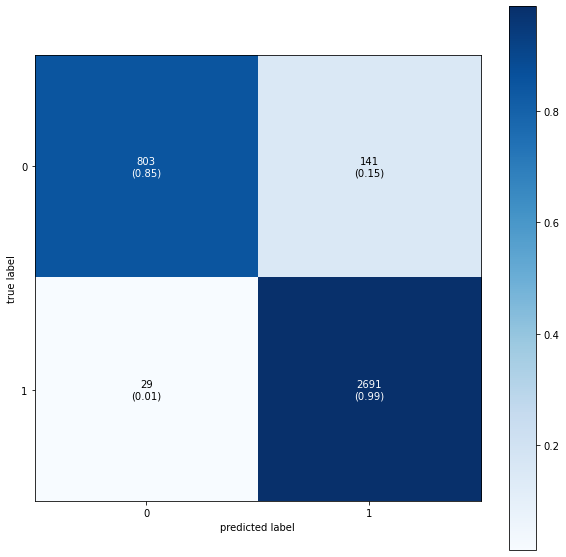

In [65]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Precision, Recall, F1

In [66]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.97      0.85      0.90       944
           1       0.95      0.99      0.97      2720

    accuracy                           0.95      3664
   macro avg       0.96      0.92      0.94      3664
weighted avg       0.95      0.95      0.95      3664





# ROC CURVE

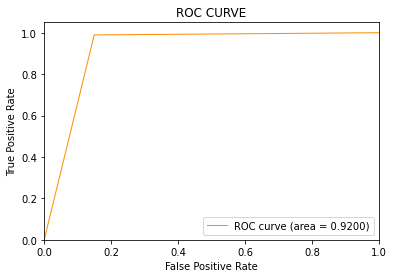

In [67]:
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [68]:
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(X_train , y_train)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

In [69]:
y_pred1 = Ran_For.predict(X_test)
rn=Ran_For.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(Ran_For.score(X_test, y_test)))

Accuracy score= 0.9563


# Confusion Matrix



confusion matrix


[[ 815  129]
 [  31 2689]]




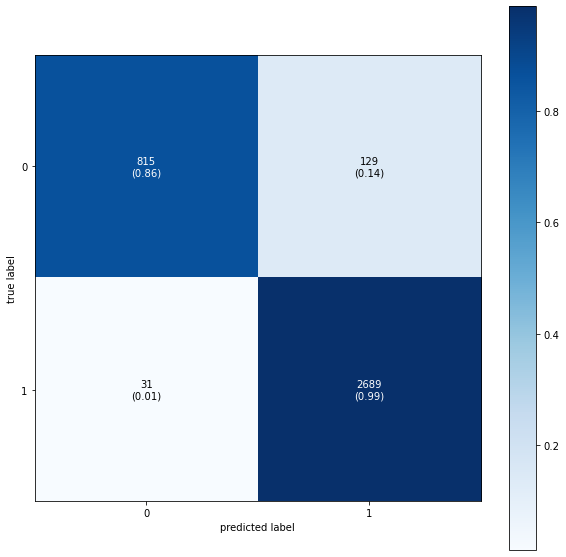

In [70]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Precision, Recall, F1

In [71]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.96      0.86      0.91       944
           1       0.95      0.99      0.97      2720

    accuracy                           0.96      3664
   macro avg       0.96      0.93      0.94      3664
weighted avg       0.96      0.96      0.96      3664





# ROC CURVE

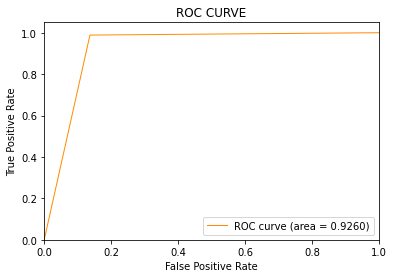

In [72]:
fpr2, tpr2, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
plt.plot(fpr2, tpr2, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# SVM Support Vector Machine

In [73]:
svc=LinearSVC(random_state=0, tol=1e-5)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(random_state=0, tol=1e-05)

In [74]:
y_pred1 = svc.predict(X_test)
sv=svc.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.9490


# Confusion Matrix



confusion matrix


[[ 810  134]
 [  53 2667]]




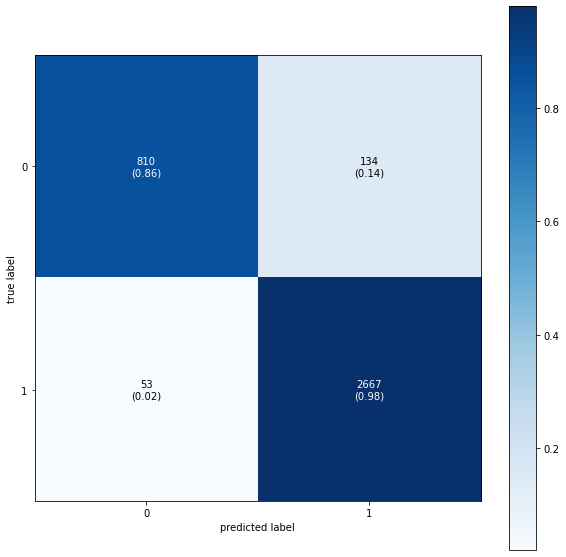

In [75]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Precision, Recall, F1

In [76]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.94      0.86      0.90       944
           1       0.95      0.98      0.97      2720

    accuracy                           0.95      3664
   macro avg       0.95      0.92      0.93      3664
weighted avg       0.95      0.95      0.95      3664





# ROC CURVE

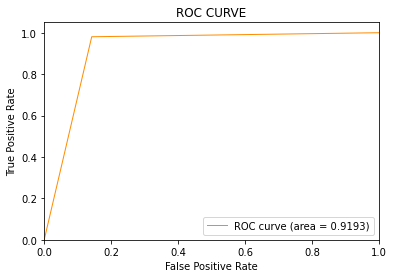

In [77]:
fpr3, tpr3, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr3, tpr3)
plt.figure()
plt.plot(fpr3, tpr3, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [78]:
LR= LogisticRegression()
LR= LR.fit(X_train , y_train)
LR

LogisticRegression()

In [79]:
y_pred1 = LR.predict(X_test)
lr=LR.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR.score(X_test, y_test)))

Accuracy score= 0.9506


# Confusion Matrix



confusion matrix


[[ 810  134]
 [  47 2673]]




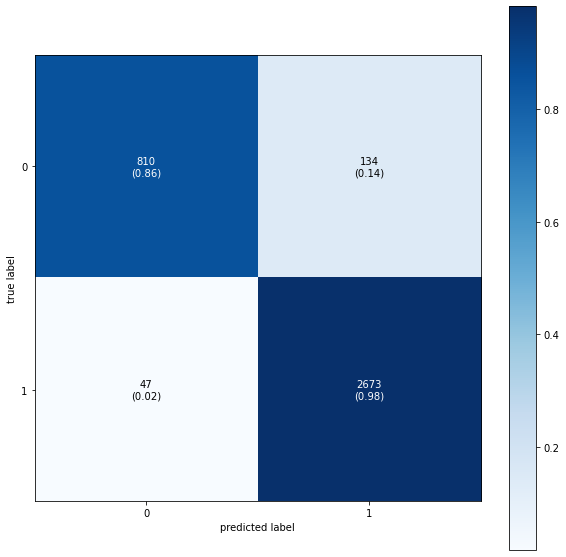

In [80]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Precision, Recall, F1

In [81]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.95      0.86      0.90       944
           1       0.95      0.98      0.97      2720

    accuracy                           0.95      3664
   macro avg       0.95      0.92      0.93      3664
weighted avg       0.95      0.95      0.95      3664





# ROC CURVE

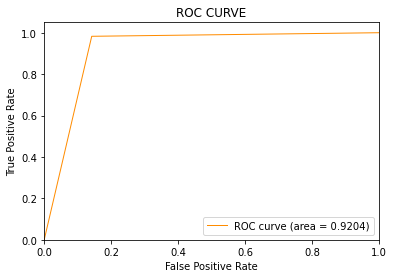

In [82]:
fpr4, tpr4, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr4, tpr4)
plt.figure()
plt.plot(fpr4, tpr4, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# KNN Algorithm

In [83]:
from sklearn.naive_bayes import GaussianNB
KNN=GaussianNB()
KNN= KNN.fit(X_train , y_train)
KNN

GaussianNB()

In [84]:
y_pred1 = KNN.predict(X_test)
kn=KNN.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN.score(X_test, y_test)))

Accuracy score= 0.8903


# Confusion Matrix



confusion matrix


[[ 553  391]
 [  11 2709]]




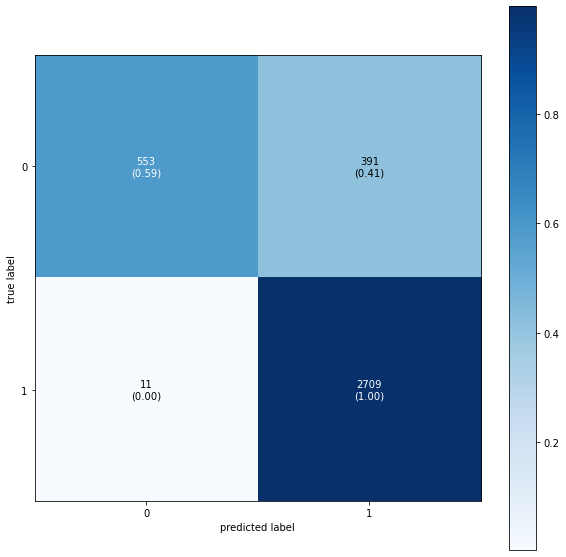

In [85]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# Precision, Recall, F1

In [86]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.98      0.59      0.73       944
           1       0.87      1.00      0.93      2720

    accuracy                           0.89      3664
   macro avg       0.93      0.79      0.83      3664
weighted avg       0.90      0.89      0.88      3664





# ROC CURVE

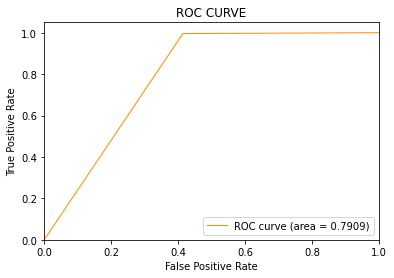

In [87]:
fpr5, tpr5, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr5, tpr5)
plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# ROC Curve for Models

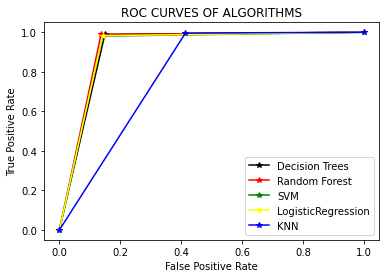

In [88]:
plt.plot(fpr1, tpr1, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr2, tpr2, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr3, tpr3, marker='*', label='SVM', color = 'green')
plt.plot(fpr4, tpr4, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr5, tpr5, marker='*', label='KNN', color = 'blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

# Comparison of all algorithms Results

In [89]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(dt,4)])
x.add_row(["Random Forest Algorithm", round(rn,4)])
x.add_row(["Support Vector Machine Algorithm", round(sv,4)])
x.add_row(["LogisticRegression Algorithm", round(lr,4)])
x.add_row(["KNN Algorithm", round(kn,4)])
print(x)
print('\n')



Comparison of all algorithm results
+----------------------------------+----------+
|              Model               | Accuracy |
+----------------------------------+----------+
|     Decision Trees Algorithm     |  0.9536  |
|     Random Forest Algorithm      |  0.9563  |
| Support Vector Machine Algorithm |  0.949   |
|   LogisticRegression Algorithm   |  0.9506  |
|          KNN Algorithm           |  0.8903  |
+----------------------------------+----------+




# Best Model with Accuracy and Time of execution

In [90]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Random Forest Algorithm", round(rn,4)])

print(x)
print('\n')



Comparison of all algorithm results
+-------------------------+----------+
|          Model          | Accuracy |
+-------------------------+----------+
| Random Forest Algorithm |  0.9563  |
+-------------------------+----------+




# Train on all training data now to make it more good on more data

In [91]:
Ran_For= LogisticRegression()
Ran_For= Ran_For.fit(X , y)
Ran_For

LogisticRegression()

# Selecting the Test data of 8997 rows

In [92]:
Testdata=normalized_data_with_selected_features.tail(8997)

In [93]:
Testdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Termination_Status
12212,0.000000,0.206701,0.206701,0.206701,0.334447,0.334448,0.334449,0.24,0.018610,0.173068,0.332538,0.322652,0.209330,1.000000,0.185713,0.0,0.0,1
12213,0.000024,0.240339,0.240339,0.240339,0.376600,0.376600,0.376600,0.00,0.025679,0.003319,0.308688,0.296637,0.004719,0.188571,0.999354,0.0,0.0,1
12214,0.000144,0.241075,0.241075,0.241076,0.305318,0.305318,0.305318,0.24,0.032656,0.165718,0.326405,0.372145,0.079548,0.045714,0.574837,0.0,0.0,1
12215,0.000961,0.168555,0.168555,0.168556,0.282799,0.282799,0.282799,0.24,0.010614,0.173068,0.333560,0.326459,0.325555,1.000000,0.890032,0.0,0.0,1
12216,0.001009,0.145427,0.145427,0.145426,0.241622,0.241622,0.241621,0.24,0.009321,0.173068,0.339693,0.335660,1.000000,1.000000,0.887208,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,0.999520,0.091260,0.091260,0.091260,0.141572,0.141572,0.141572,0.00,0.006618,0.000474,0.267802,0.271256,0.003589,0.000000,0.003185,0.0,0.0,1
21205,0.999544,0.079050,0.079050,0.079050,0.133850,0.133850,0.133850,0.00,0.007533,0.001659,0.351959,0.326459,0.003987,0.000000,0.003530,0.0,0.0,1
21206,0.999568,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.00,0.000000,0.000000,0.362181,0.337246,0.003190,0.000000,0.002824,0.0,0.0,1
21207,0.999712,0.051240,0.051240,0.051241,0.084952,0.084952,0.084952,0.00,0.002900,0.000474,0.339012,0.339784,0.003589,0.000000,0.003185,0.0,0.0,1


# As we are going to Predict the 'Termination_Status' so we dont need this 

In [94]:
Testdata=Testdata.drop(columns=['Termination_Status'])
Testdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
12212,0.000000,0.206701,0.206701,0.206701,0.334447,0.334448,0.334449,0.24,0.018610,0.173068,0.332538,0.322652,0.209330,1.000000,0.185713,0.0,0.0
12213,0.000024,0.240339,0.240339,0.240339,0.376600,0.376600,0.376600,0.00,0.025679,0.003319,0.308688,0.296637,0.004719,0.188571,0.999354,0.0,0.0
12214,0.000144,0.241075,0.241075,0.241076,0.305318,0.305318,0.305318,0.24,0.032656,0.165718,0.326405,0.372145,0.079548,0.045714,0.574837,0.0,0.0
12215,0.000961,0.168555,0.168555,0.168556,0.282799,0.282799,0.282799,0.24,0.010614,0.173068,0.333560,0.326459,0.325555,1.000000,0.890032,0.0,0.0
12216,0.001009,0.145427,0.145427,0.145426,0.241622,0.241622,0.241621,0.24,0.009321,0.173068,0.339693,0.335660,1.000000,1.000000,0.887208,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21204,0.999520,0.091260,0.091260,0.091260,0.141572,0.141572,0.141572,0.00,0.006618,0.000474,0.267802,0.271256,0.003589,0.000000,0.003185,0.0,0.0
21205,0.999544,0.079050,0.079050,0.079050,0.133850,0.133850,0.133850,0.00,0.007533,0.001659,0.351959,0.326459,0.003987,0.000000,0.003530,0.0,0.0
21206,0.999568,0.021233,0.021233,0.021233,0.041185,0.041185,0.041185,0.00,0.000000,0.000000,0.362181,0.337246,0.003190,0.000000,0.002824,0.0,0.0
21207,0.999712,0.051240,0.051240,0.051241,0.084952,0.084952,0.084952,0.00,0.002900,0.000474,0.339012,0.339784,0.003589,0.000000,0.003185,0.0,0.0


# Getting Probabilties on the Test data using Decision Trees Trained Model

In [95]:
predictions=Ran_For.predict_proba(Testdata)
predictions = np.amax(predictions, axis=1)
predictions

array([0.89484018, 0.99981501, 0.99123215, ..., 0.99817415, 0.99826815,
       0.99853741])

In [96]:
Pred=pd.DataFrame()
Pred['Test data predictions probabilties']=predictions
Pred['Test data predictions probabilties']=round(Pred['Test data predictions probabilties'],2)
Pred['Test data predictions probabilties']

0       0.89
1       1.00
2       0.99
3       0.98
4       0.99
        ... 
8992    1.00
8993    1.00
8994    1.00
8995    1.00
8996    1.00
Name: Test data predictions probabilties, Length: 8997, dtype: float64

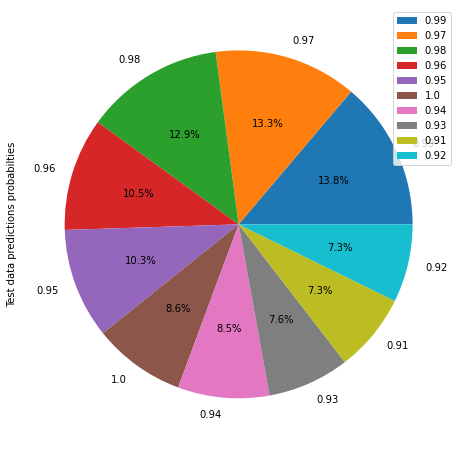

In [97]:
Pred['Test data predictions probabilties'].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [98]:
Pred['Test data predictions probabilties'].value_counts()

0.99    835
0.97    805
0.98    780
0.96    635
0.95    620
1.00    519
0.94    514
0.93    460
0.91    441
0.92    439
0.90    411
0.89    332
0.88    326
0.87    274
0.86    256
0.85    209
0.84    169
0.83    158
0.82    121
0.81    106
0.80     85
0.79     67
0.78     58
0.77     44
0.76     43
0.75     25
0.69     23
0.74     22
0.73     22
0.66     19
0.70     18
0.71     16
0.72     16
0.59     14
0.67     13
0.58     10
0.51      9
0.54      9
0.62      9
0.65      9
0.55      8
0.61      7
0.52      7
0.63      7
0.68      6
0.64      5
0.60      5
0.57      4
0.56      3
0.50      3
0.53      1
Name: Test data predictions probabilties, dtype: int64

# Getting Prediction on the Test data using Decision Trees Trained Model

In [99]:
predictions=DTC.predict(Testdata)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [100]:
Pred['Test data predictions']=predictions
Pred['Test data predictions']=Pred['Test data predictions'].replace(0,'Yes')
Pred['Test data predictions']=Pred['Test data predictions'].replace(1,'No')
Pred

,Test data predictions probabilties,Test data predictions
0,0.89,No
1,1.00,No
2,0.99,No
3,0.98,No
4,0.99,No
...,...,...
8992,1.00,No
8993,1.00,No
8994,1.00,No
8995,1.00,No


# Percentage of Predictions that are going to terminate is 1% and percentage of predictions that are not going to terminate are 99%

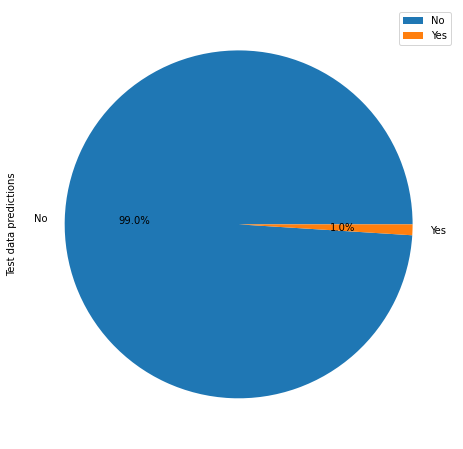

In [101]:
Pred['Test data predictions'].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()


In [102]:
Pred['Test data predictions'].value_counts()

No     8907
Yes      90
Name: Test data predictions, dtype: int64

# Saving the probabilties and predictions in the last column of test data as Predictions

In [103]:
Test_data['Test data predictions']=Pred['Test data predictions probabilties']
Test_data['Test data predictions']=Pred['Test data predictions']

In [104]:
Test_data.to_csv('Headcount Test with Predictions probabilties Sep.csv')
print('Headcount Test with Predictions probabilties file saved')

Headcount Test with Predictions probabilties file saved
